# Bias and Variance: Understanding Model Error

---

## 1. What is Bias?
Think of bias as the error from wrong assumptions in the model.

A very simple model (like a straight line for a wiggly dataset) will miss important patterns.

This gives systematic errors → high bias.

👉 **Example:**
Trying to fit house prices with just “price = 1000 × rooms”.

Too simple → always wrong in the same direction.

---

## 2. What is Variance?
Variance is the error from too much sensitivity to training data.

A very complex model (like a high-degree polynomial) will perfectly fit the training data but fail on new data.

This means the model “changes its mind” too much when data changes.

👉 **Example:**
Using a 10th degree curve to fit 5 data points.

Fits training set perfectly.

But on new houses, predictions go crazy.

---

## 3. The Bias-Variance Tradeoff
If model is too simple → High Bias, Low Variance.
(underfitting: always wrong in the same way).

If model is too complex → Low Bias, High Variance.
(overfitting: memorizes training data but fails on test data).

The sweet spot is in the middle → Balance between bias & variance.

---

## 4. The Math (core idea)
We can decompose prediction error (Expected Mean Squared Error, MSE):

$Error = \underbrace{Bias^2}_{\text{wrong assumptions}} + \underbrace{Variance}_{\text{sensitivity to data}} + \underbrace{Irreducible\ Error}_{\text{noise in data}}$

- **Bias²** → how far predictions are on average from the truth.
- **Variance** → how much predictions change when training data changes.
- **Irreducible error** → randomness/noise we can’t avoid.

---

## 5. Intuition with a Dartboard 🎯
Imagine throwing darts at a dartboard:

- **High Bias, Low Variance** → darts clustered but far from the bullseye (consistently wrong).
- **Low Bias, High Variance** → darts spread all over, some hit bullseye, many don’t.
- **Low Bias, Low Variance** → darts tightly clustered on bullseye (ideal model).
- **High Bias, High Variance** → scattered and far away.


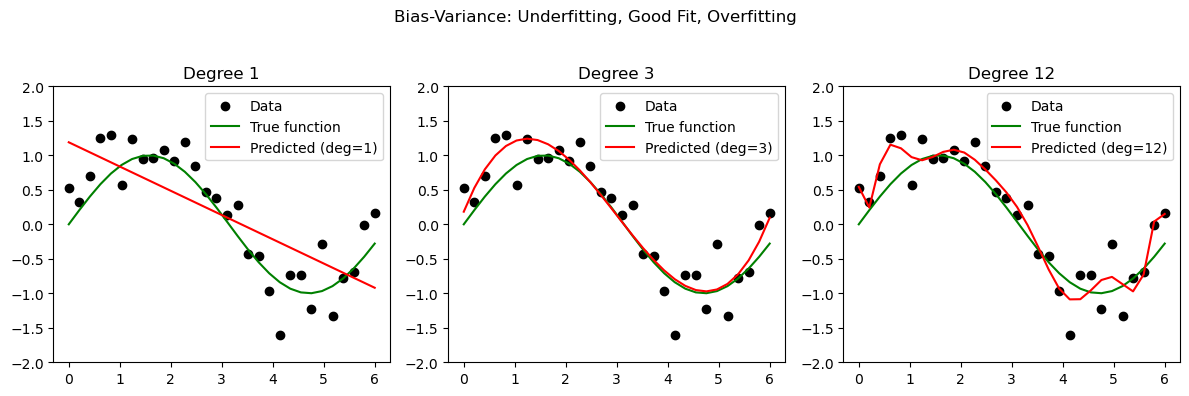

In [1]:
# Example: Visualizing Bias and Variance with Polynomial Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 6, 30)
y_true = np.sin(x)
y = y_true + np.random.normal(0, 0.3, size=x.shape)

# Fit models: underfit (degree 1), good fit (degree 3), overfit (degree 12)
degrees = [1, 3, 12]
plt.figure(figsize=(12, 4))
for i, deg in enumerate(degrees, 1):
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    y_pred = model.predict(x[:, np.newaxis])
    plt.subplot(1, 3, i)
    plt.scatter(x, y, color='black', label='Data')
    plt.plot(x, y_true, color='green', label='True function')
    plt.plot(x, y_pred, color='red', label=f'Predicted (deg={deg})')
    plt.title(f'Degree {deg}')
    plt.ylim(-2, 2)
    plt.legend()
plt.suptitle('Bias-Variance: Underfitting, Good Fit, Overfitting')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# How to Tackle Overfitting and Underfitting

Let’s list remedies like a doctor’s prescription:

---

## For Overfitting:
- Get more data (reduces noise impact).
- Use regularization (like L1/Lasso or L2/Ridge penalties).
- Simplify the model (fewer parameters, less depth in decision trees/NNs).
- Use dropout (in neural nets).
- Apply cross-validation to tune complexity.

---

## For Underfitting:
- Make the model more complex (add more features, deeper trees, bigger neural nets).
- Reduce regularization strength.
- Give the model more time to learn (more training).
